# 1. Importar pacotes necessários

Voltar ao [índice](../../00_indice.ipynb)

Pandas é um pacote muito utilizado para realizar operações em grandes tabelas de dados
numpy contém vários métodos e funções matemáticas (e estatísticas?)
matplotlib é um pacote com várias ferramentas para visualizar os dados através de gráficos

In [2]:
#Para instalar plotly

#pip install plotly
#pip install statsmodels
#pip install nbformat>=4.2.0

In [3]:
#importar as bibliotecas

import pandas as pd

# 2. Ler as bases de dados financiamento

Em posse dos dados csv na mesma pasta que este script, usamos o método 'read_csv' para gerar um objeto em python chamado *dataframe* (df).
Uma vez que o nome dos candidatos aparecem mais de uma vez, usamos o método 'groupby' juntamente com o '.agg' para juntar as linhas contendo o mesmo nome e somando o total de votos que cada um teve: (? rever ?)

In [2]:
df_receita = pd.read_csv('dados/receitas_candidatos_SP.csv', encoding='latin-1', sep=';')
df_receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ano de eleição           10237 non-null  int64 
 1   Cargo                    10237 non-null  object
 2   Esfera                   10237 non-null  object
 3   Esfera partidária        10237 non-null  object
 4   Espécie receita          10237 non-null  object
 5   Fonte de receita         10237 non-null  object
 6   Município                10237 non-null  object
 7   Nome candidato           10237 non-null  object
 8   Nome doador              10237 non-null  object
 9   Origem da receita        10237 non-null  object
 10  Partido                  10237 non-null  object
 11  Região                   10237 non-null  object
 12  Situação de candidatura  10237 non-null  object
 13  Situação de totalização  10237 non-null  object
 14  UF                       10237 non-nul

# 3. Reestruturando dados

In [3]:
df_receita = df_receita[df_receita['Situação de candidatura']=='Apto']
df_receita = df_receita[['Nome candidato', 'Nome doador', 'Origem da receita', 'Fonte de receita', 'Partido', 'Situação de totalização', 'Valor de receita']]
df_receita['Valor de receita'] = df_receita['Valor de receita'].str.replace(',', '.').astype(float)

# 4. GroupBy

## 4.1 Agrupamento por candidato

In [4]:
df_receita_candidato = df_receita.groupby('Nome candidato').agg({'Valor de receita':'sum', 'Nome doador':'count'})
df_receita_candidato = df_receita_candidato.rename(columns={'Nome doador': 'Quantidade de doadores'})
df_receita_candidato.head()

,Valor de receita,Quantidade de doadores
Nome candidato,,
ABER JOÁS TOFANELLI,152885.00,3
ABRAHAM BRAGANÇA DE VASCONCELLOS WEINTRAUB,135935.01,2
ADALBERTO FELICIO MALUF FILHO,319900.00,3
ADAMARIO MAXIMO DOS SANTOS FILHO,4741.53,4
ADAUTO BENTIVEGNA FILHO,125881.36,6


## 4.1 Agrupamento por doador

In [5]:
df_receita_doador = df_receita[df_receita['Origem da receita']=='Recursos de pessoas físicas']
df_receita_doador = df_receita_doador.groupby('Nome doador').agg({'Valor de receita':'sum'})
df_receita_doador.sort_values('Valor de receita', ascending=False).head()

,Valor de receita
Nome doador,
JOSE SALIM MATTAR JUNIOR,1350000.00
PEDRO DE GODOY BUENO,950000.00
WILSON DE ALMEIDA JUNIOR,840000.00
CANDIDO BOTELHO BRACHER,819353.91
EDUARDO ROBSON RAINERI DE ALMEIDA,750000.00


# 5. Pivot

In [6]:
import numpy as np

df_cand_font = pd.pivot_table(df_receita, values='Valor de receita', index=['Nome candidato', 'Partido', 'Situação de totalização'], columns='Origem da receita', aggfunc=np.sum, fill_value=0)
df_cand_font['Total da receita'] = df_cand_font.sum(axis=1)
df_cand_font = df_cand_font.reset_index()
df_cand_font.head()

Origem da receita,Nome candidato,Partido,Situação de totalização,Doações pela Internet,Recursos de Financiamento Coletivo,Recursos de origens não identificadas,Recursos de outros candidatos,Recursos de partido político,Recursos de pessoas físicas,Recursos próprios,Rendimentos de aplicações financeiras,Total da receita
0,ABER JOÁS TOFANELLI,PDT,Não eleito,0,2275.0,0.0,0.0,150000.00,0.0,610.00,0.0,152885.00
1,ABRAHAM BRAGANÇA DE VASCONCELLOS WEINTRAUB,PMB,Não eleito,0,4635.0,0.0,0.0,0.00,0.0,131300.01,0.0,135935.01
2,ADALBERTO FELICIO MALUF FILHO,PV,Suplente,0,0.0,0.0,0.0,309900.00,0.0,10000.00,0.0,319900.00
3,ADAMARIO MAXIMO DOS SANTOS FILHO,NOVO,Suplente,0,3220.0,0.0,0.0,1241.53,280.0,0.00,0.0,4741.53
4,ADAUTO BENTIVEGNA FILHO,AVANTE,Não eleito,0,0.0,0.0,0.0,54381.75,12300.0,59199.61,0.0,125881.36


# 6. Join

In [7]:
df_votos = pd.read_csv('dados/votacao_candidato_SP.csv', encoding='latin-1', sep=';')
df_votos = df_votos.groupby(['Nome candidato', 'Situação totalização', 'Partido']).agg({'Votos nominais':sum})
df_candidatos = df_receita_candidato.join(df_votos, how='inner')
df_candidatos = df_candidatos.reset_index()
df_candidatos['R$/voto'] = df_candidatos['Valor de receita']/df_candidatos['Votos nominais']
df_candidatos

,Nome candidato,Situação totalização,Partido,Valor de receita,Quantidade de doadores,Votos nominais,R$/voto
0,ABRAHAM BRAGANÇA DE VASCONCELLOS WEINTRAUB,Não Eleito,PMB,135935.01,2,4057,33.506288
1,ADALBERTO FELICIO MALUF FILHO,Suplente,PV,319900.00,3,3162,101.170145
2,ADAMARIO MAXIMO DOS SANTOS FILHO,Suplente,NOVO,4741.53,4,2597,1.825772
3,ADAUTO BENTIVEGNA FILHO,Não Eleito,AVANTE,125881.36,6,1002,125.630100
4,ADELAIDE CASTRO DE OLIVEIRA,Suplente,PODE,333923.20,8,1516,220.265963
...,...,...,...,...,...,...,...
1235,WILSON LIMA DA SILVA,Suplente,PSB,47796.36,2,645,74.102884
1236,YAN LOPES DE ALMEIDA,Suplente,PSC,88722.60,16,9112,9.736896
1237,YARA DE SOUZA LIMA,Não Eleito,PMN,20000.00,1,93,215.053763
1238,ZULEICA MADALENA SANTORO,Suplente,PODE,100669.00,2,416,241.992788


In [8]:
df_candidatos[df_candidatos['Situação totalização']== 'Eleito'].sort_values('R$/voto', ascending=False)

,Nome candidato,Situação totalização,Partido,Valor de receita,Quantidade de doadores,Votos nominais,R$/voto
575,JONAS DONIZETTE FERREIRA,Eleito,PSB,3147286.96,59,84044,37.448086
405,FAUSTO RUY PINATO,Eleito,PP,2530515.27,19,72169,35.063743
130,ARNALDO CALIL PEREIRA JARDIM,Eleito,CIDADANIA,3789999.99,70,113462,33.403254
422,FERNANDO JOSE DE SOUZA MARANGONI,Eleito,UNIÃO,2876708.34,48,89390,32.181545
819,MARIA DO PARTO MENDES ROSAS,Eleito,REPUBLICANOS,2899335.60,5,94787,30.587903
...,...,...,...,...,...,...,...
943,PAULO FRANCISCO MUNIZ BILYNSKYJ,Eleito,PL,221147.64,9,72156,3.064854
492,GUILHERME CASTRO BOULOS,Eleito,PSOL,2829243.22,76,1001472,2.825085
851,MARIO PALUMBO JUNIOR,Eleito,MDB,585331.00,56,254898,2.296334
161,CARLA ZAMBELLI SALGADO DE OLIVEIRA,Eleito,PL,2146899.69,57,946244,2.268865


In [9]:
df_candidatos[df_candidatos['Situação totalização']== 'Eleito']['R$/voto'].mean()

13.783709949932835

<Axes: xlabel='R$/voto', ylabel='Count'>

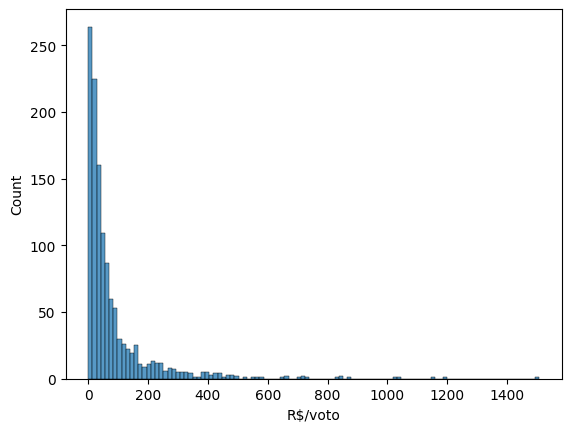

In [10]:
import seaborn as sns

sns.histplot(data=df_candidatos, x='R$/voto')

# 7. Correlação

C:\Users\jayme\AppData\Local\Temp\ipykernel_83480\942885752.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sn.heatmap(df_candidatos.corr(), annot = True, fmt=".1f", linewidths=.6)


<Axes: >

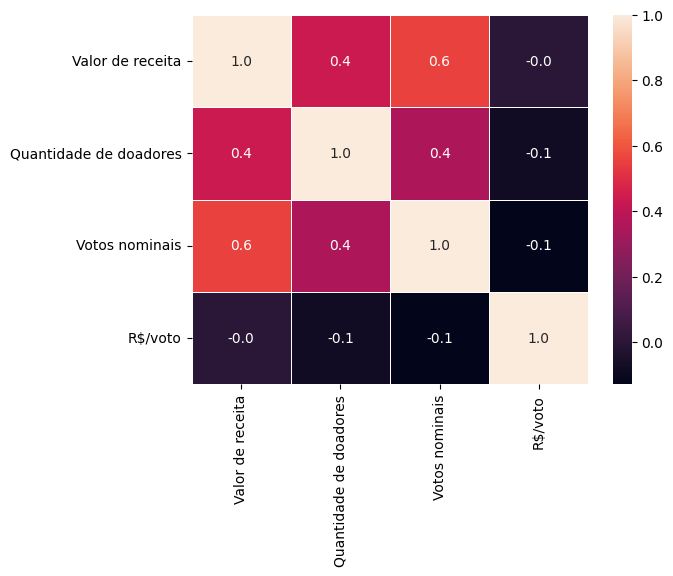

In [11]:
import seaborn as sn

plot = sn.heatmap(df_candidatos.corr(), annot = True, fmt=".1f", linewidths=.6)
plot

# 8. Transformação Log

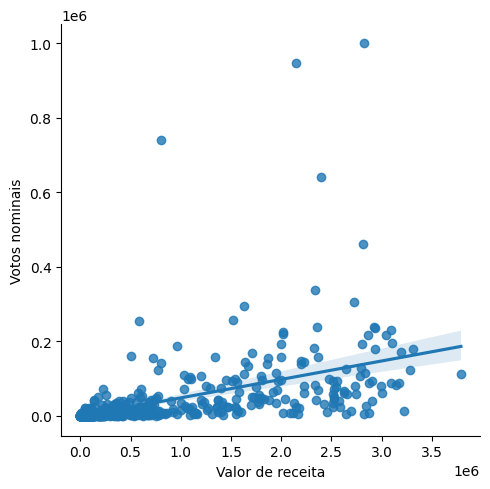

In [12]:
import seaborn as sns
sns.lmplot(data=df_candidatos.reset_index(), y="Votos nominais", x="Valor de receita")

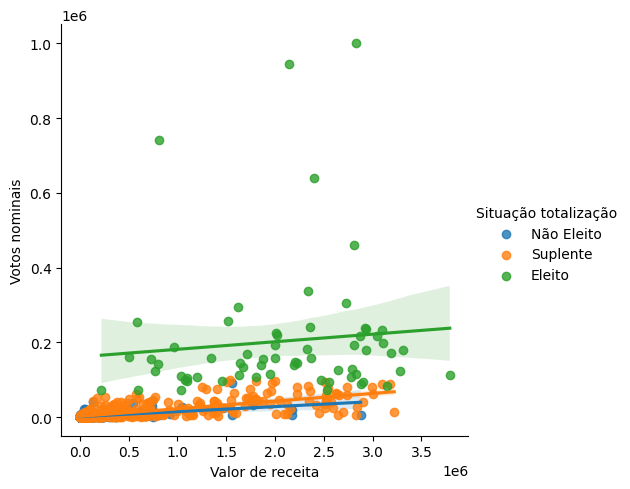

In [13]:
import seaborn as sns
sns.lmplot(data=df_candidatos.reset_index(), y="Votos nominais", x="Valor de receita", hue='Situação totalização')

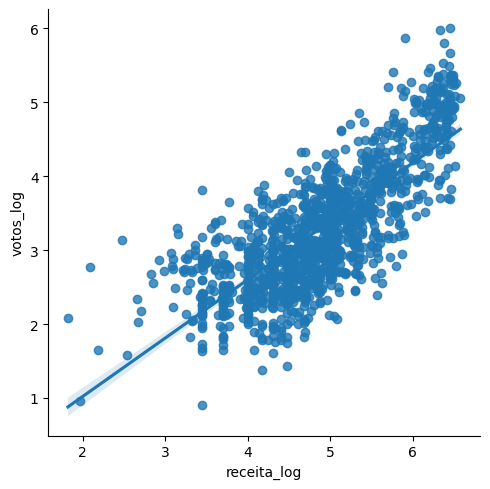

In [28]:
import numpy as np

df_candidatos['receita_log'] = np.log10(df_candidatos['Valor de receita']+1)
df_candidatos['votos_log'] = np.log10(df_candidatos['Votos nominais']+1)
df_candidatos['R$/voto_log'] = np.log10(df_candidatos['Valor de receita']+1)/np.log10(df_candidatos['Votos nominais']+1)

sns.lmplot(data=df_candidatos.reset_index(), y="votos_log", x="receita_log")

In [29]:
fig = px.scatter(df_candidatos, y="votos_log", x="receita_log", trendline="ols", hover_data=['Nome candidato', 'Partido'])
fig.show()

C:\Users\jayme\AppData\Local\Temp\ipykernel_83480\3471034572.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

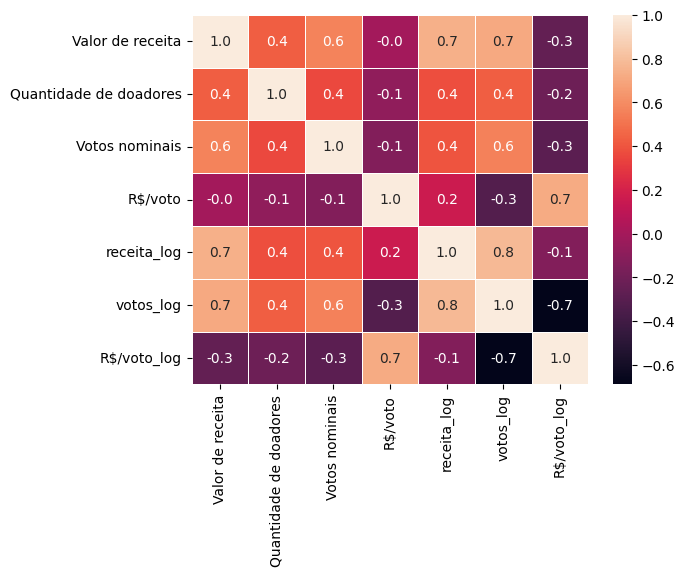

In [30]:
plot = sn.heatmap(df_candidatos.corr(), annot = True, fmt=".1f", linewidths=.6)
plot

In [ ]:
sns.lmplot(data=df_candidatos.reset_index(), y="votos_log", x="receita_log")

In [14]:
import plotly.express as px

fig = px.scatter(df_candidatos, y="Votos nominais", x="Valor de receita", trendline="ols", color='Situação totalização', hover_data=['Nome candidato', 'Partido'])
fig.show()

In [15]:
df_sem_outliers = df_candidatos[df_candidatos["Votos nominais"]<400000]

fig = px.scatter(df_sem_outliers, y="Votos nominais", x="Valor de receita", trendline="ols", color='Situação totalização', hover_data=['Nome candidato', 'Partido'])
fig.show()

<Axes: xlabel='R$/voto_log', ylabel='Count'>

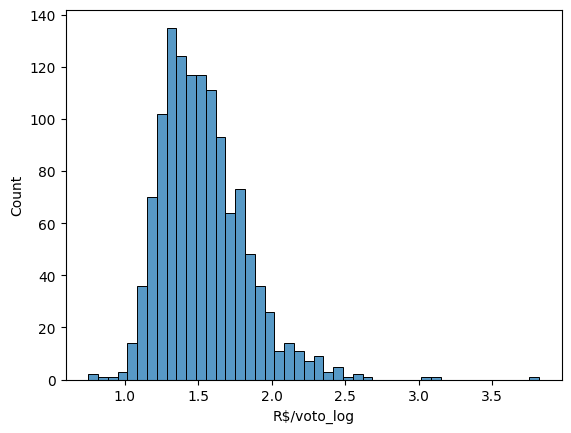

In [31]:
sns.histplot(data=df_candidatos, x='R$/voto_log')

In [21]:
import plotly.graph_objects as go

top_doadores = df_receita_doador.nlargest(3, 'Valor de receita').index.tolist()

df_doad_cand = df_receita.groupby(['Nome candidato', 'Nome doador', 'Partido']).agg({'Valor de receita': sum}).reset_index()

df_doad_cand = df_doad_cand[df_doad_cand['Nome doador'].isin(top_doadores)]

In [22]:
# Selecionando os 3 maiores doadores
top_doadores = df_receita_doador.nlargest(3, 'Valor de receita').reset_index()['Nome doador'].tolist()

# Filtrando os dados para os 3 maiores doadores
df_doad_cand = df_receita.groupby(['Nome candidato', 'Nome doador', 'Partido']).agg({'Valor de receita': sum}).reset_index()
df_doad_cand = df_doad_cand[df_doad_cand['Nome doador'].isin(top_doadores)].sort_values('Partido')

###########
df_doad_part = df_doad_cand.groupby(['Nome doador', 'Partido']).agg({'Valor de receita': sum}).reset_index().sort_values('Partido')

# Criando um dicionário para mapear os partidos aos índices dos nós
partidos_indices = {partido: i + len(df_doad_cand['Nome candidato'].unique().tolist()) + len(df_doad_cand['Nome doador'].unique().tolist())
                    for i, partido in enumerate(df_doad_cand['Partido'].unique().tolist())}

# Criando os rótulos dos nós incluindo os partidos
node_labels = (df_doad_cand['Nome candidato'].unique().tolist() + df_doad_cand['Partido'].unique().tolist() + df_doad_cand['Nome doador'].unique().tolist())

# Criando o objeto de sankey
sankey = go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=node_labels
    ),
    link=dict(
        source=pd.concat([df_doad_part['Nome doador'].map(lambda x: node_labels.index(x)), df_doad_cand['Partido'].map(lambda x: node_labels.index(x))]),
        target=pd.concat([df_doad_part['Partido'].map(lambda x: node_labels.index(x)), df_doad_cand['Nome candidato'].map(lambda x: node_labels.index(x))]),
        value=df_doad_part['Valor de receita'].tolist() + df_doad_cand['Valor de receita'].tolist()
    )
)

# Configurando o layout
layout = go.Layout(
    title='Fluxo de doações para candidatos (com Partidos)',
    font=dict(size=10)
)

# Criando a figura e plotando o diagrama de sankey
fig = go.Figure(data=[sankey], layout=layout)
fig.show()


<center>
    <img src="https://nucleodetecnologia.com.br/assets/img/novo-logo-tecnologia.svg?bl=tutorial-eleitoral-10" width="150">
</center>